In [3]:
#ABILITà Informatiche
#dati Veneto blocco 21

In [45]:
conda install -c bioconda imctools

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\march\anaconda3

  added / updated specs:
    - imctools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39haa95532_3         931 KB
    imctools-1.0.8             |     pyh864c0ab_0          49 KB  bioconda
    ruamel.yaml-0.17.21        |   py39h2bbff1b_0         174 KB
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  imctools           bioconda/noarch::imctools-1.0.8-pyh864c0ab_0 None
  ruamel.yaml        pkgs/main/win-64::ruamel.yaml-0.17.21-py39h2bbff1b_0 None
  ruamel.yaml.clib   pkgs/main/win-64::ruamel.yaml.clib-0.2.6-py39h2bbff1b_1 None

The following packages

In [4]:
import numpy as np
import imageio
import matplotlib
import math
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import json
import imctools
%matplotlib notebook

In [5]:
indata = open('dpc-covid19-ita-regioni.json')
dati = json.load(indata)

In [6]:
dati[20]

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'codice_regione': 5,
 'denominazione_regione': 'Veneto',
 'lat': 45.43490485,
 'long': 12.33845213,
 'ricoverati_con_sintomi': 12,
 'terapia_intensiva': 4,
 'totale_ospedalizzati': 16,
 'isolamento_domiciliare': 16,
 'totale_positivi': 32,
 'variazione_totale_positivi': 0,
 'nuovi_positivi': 32,
 'dimessi_guariti': 0,
 'deceduti': 1,
 'casi_da_sospetto_diagnostico': None,
 'casi_da_screening': None,
 'totale_casi': 33,
 'tamponi': 2200,
 'casi_testati': None,
 'note': None,
 'ingressi_terapia_intensiva': None,
 'note_test': None,
 'note_casi': None,
 'totale_positivi_test_molecolare': None,
 'totale_positivi_test_antigenico_rapido': None,
 'tamponi_test_molecolare': None,
 'tamponi_test_antigenico_rapido': None,
 'codice_nuts_1': None,
 'codice_nuts_2': None}

In [7]:
len(dati)

21252

In [8]:
data_tot = []
contagi_tot = []

for i in range(1012):
    data_tot.append(dati[20 + i*21]['data'])
    contagi_tot.append(dati[20 + i*21]['nuovi_positivi'])

<IPython.core.display.Javascript object>


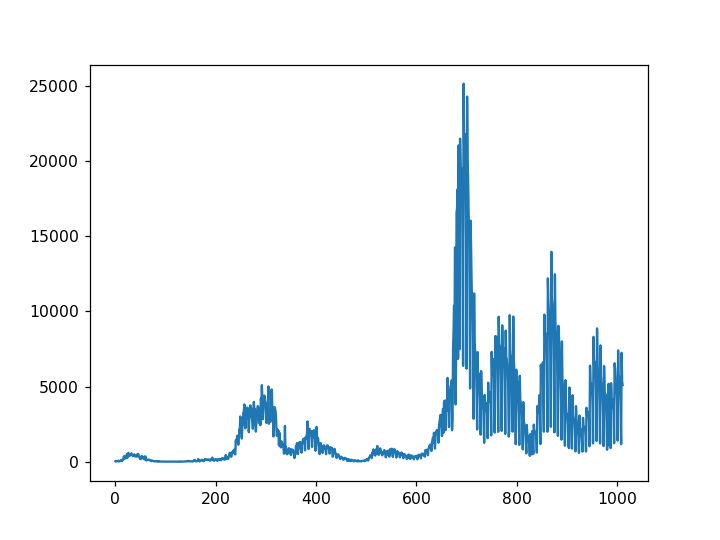

In [9]:
plt.figure()
plt.plot(contagi_tot)

<IPython.core.display.Javascript object>


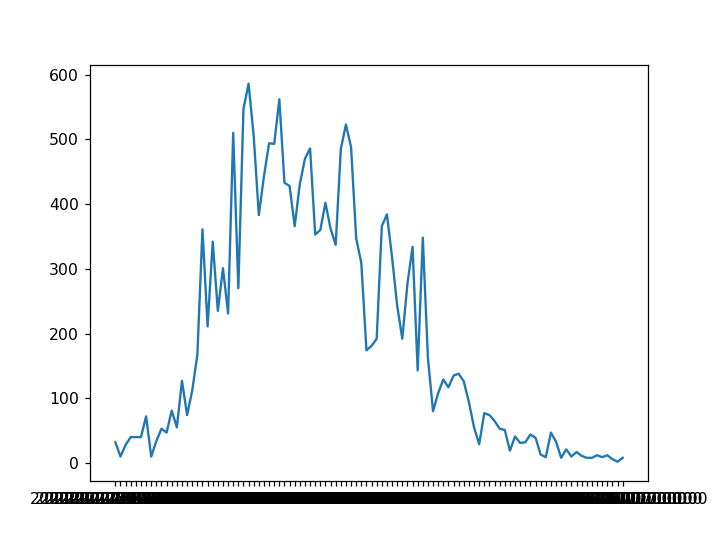

In [10]:
data = []
contagi = []
N = 100

for i in range(N):
    data.append(dati[20 + i*21]['data'])
    contagi.append(dati[20 + i*21]['nuovi_positivi'])
    
plt.figure()
plt.plot(data, contagi)

In [11]:
#funzione di gompertz

In [12]:
def gompertz(N, t0, ni, b, n0=1):
    '''
    calcolo della funzione di gompertz per N punti con t0 tempo di inizio, ni plateau della popolazione/dimensione popolazione, 
    b rate di crescita iniziale e n0 popolazione iniziale
    output funzione di gompertz e funzione di gompertz differenziale
    '''
    gomp = np.zeros(N)
    for t in range(N):
        gomp[t] = n0 * np.exp( np.log(ni[t]/n0) * ( 1 - np.exp( -b * (t-t0) ) ) )

    gomp_diff = np.zeros(N-1)
    for t in range(N-1):
            gomp_diff[t] = gomp[t+1] - gomp[t]
            
    return gomp, gomp_diff

In [13]:
#prova
t0 = 0 
b = 1

es1, es2 = gompertz(N, t0, contagi, b)

print(es1)
print(es2)

[  1.           4.28667501  17.83637068  33.28879855  37.38670912
  39.01803518  71.24077404   9.97902517  33.95980307  52.97403779
  46.99178529  80.99405524  54.99864581 126.99860943  73.99973516
 111.99983834 166.99990382 360.99991199 210.9999828  341.99998882
 234.99999736 300.9999987  230.99999965 509.99999967 269.99999994
 546.99999995 585.99999998 504.99999999 383.         443.
 494.         493.         562.         433.         428.
 366.         431.         470.         486.         353.
 360.         402.         362.         337.         485.
 523.         488.         347.         309.         174.
 181.         192.         366.         384.         318.
 243.         192.         277.         334.         143.
 348.         162.          80.         108.         129.
 117.         135.         138.         126.          94.
  55.          29.          77.          74.          65.
  53.          51.          19.          41.          31.
  32.          44.          39. 

In [15]:
#poisson likelihood

In [16]:
def log_likelihood(dati, predizione):
    '''
    calcolo del logaritmo poisson-likelihood per i dati usando come modello predizione (entrambi array) 
    '''
    N = len(dati)
    # -log(likelihood) = L
    L = 0.
    for i in range(N):
        L = L + (-dati[i]*np.log(predizione[i]) + predizione[i] )
        
    # non c'è fattoriale perchè non serve per minimizzare (log(dati[i]!) non dipende dal modello)
    return L

In [17]:
#prova
stima = np.zeros(N)
stima = stima + 1.

es = log_likelihood(contagi, stima)
es

100.0

In [18]:
#imc